In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import jaccard_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
df = pd.read_csv(r"C:\Users\sahar\Downloads\heart.csv")
df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)
df = df.dropna()

In [210]:
if df.empty:
    print("DataFrame is empty after dropping missing values.")
else:
    print("DataFrame is not empty.")

print(df.head())


DataFrame is not empty.
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [211]:

print(df.columns)
class_distribution = df['output'].value_counts()

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


output
1    165
0    138
Name: count, dtype: int64


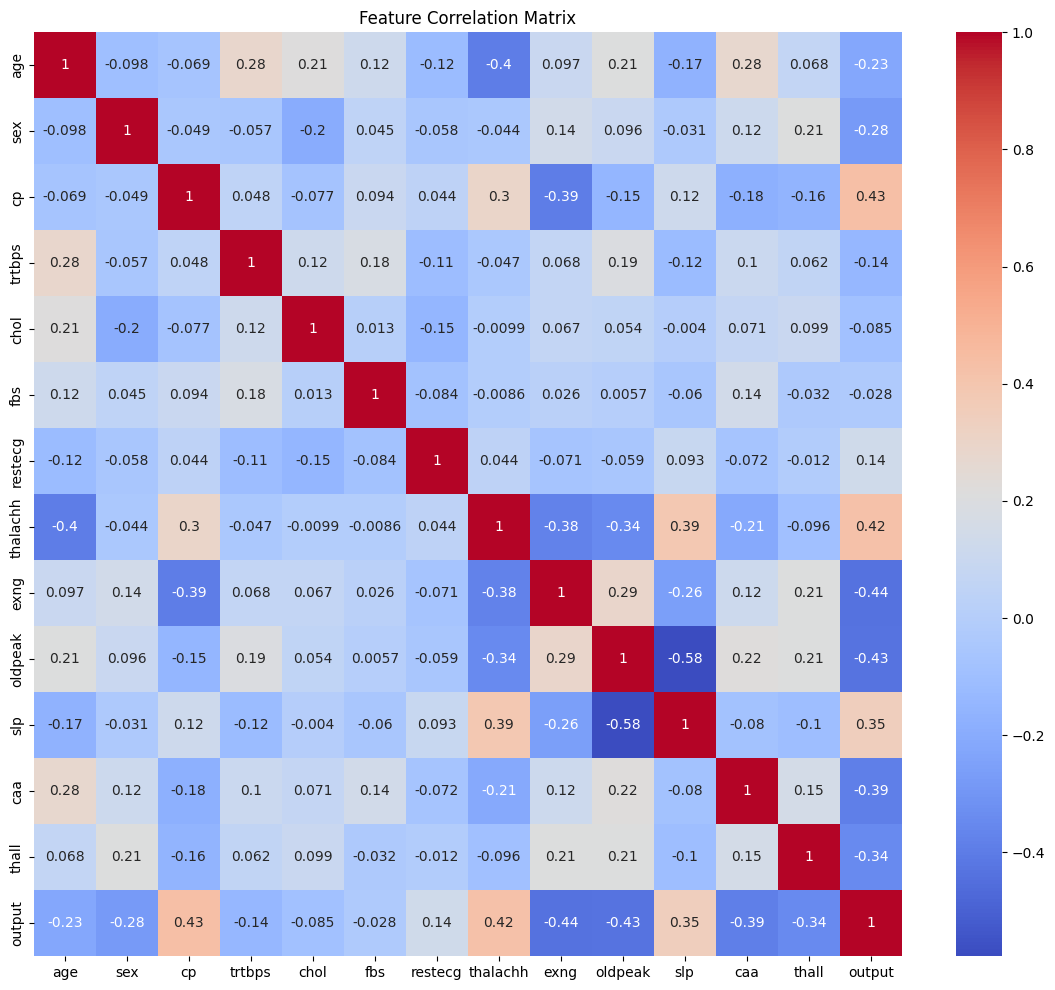

In [212]:
print(class_distribution)
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

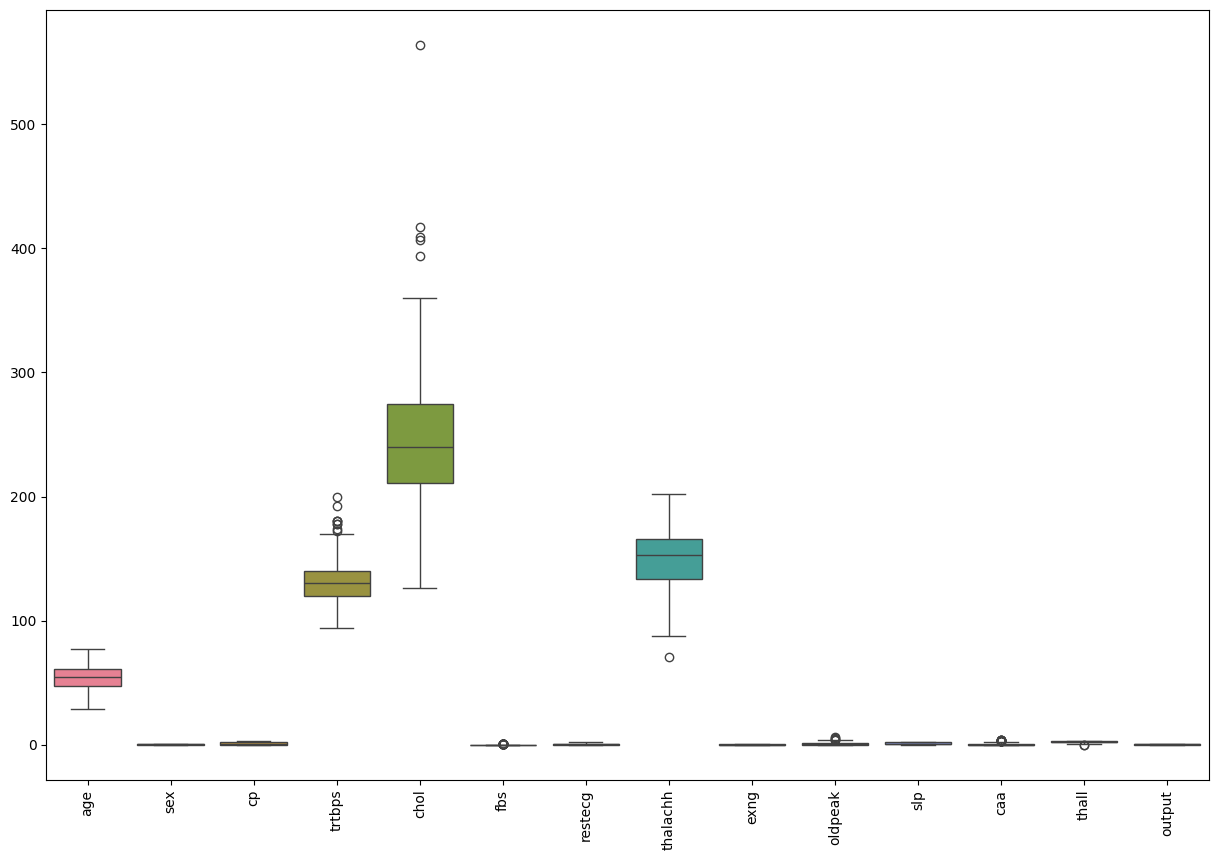

In [213]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [214]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = df['output'].values
normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X.astype(float))

In [215]:

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

logistic_regression = LogisticRegression(C=0.01, solver='liblinear')
logistic_regression.fit(train_x, train_y)

predict_logistic = logistic_regression.predict(test_x)
predict_logistic_prob = logistic_regression.predict_proba(test_x)


In [216]:
accuracy_score = metrics.accuracy_score(test_y, predict_logistic)
jaccard_score_value = jaccard_score(test_y, predict_logistic)
log_loss_value = log_loss(test_y, predict_logistic_prob)

print("metrics.accuracy_score:", accuracy_score)
print("metrics.jaccard_score:", jaccard_score_value)
print("metrics.log_loss:", log_loss_value)


metrics.accuracy_score: 0.8852459016393442
metrics.jaccard_score: 0.825
metrics.log_loss: 0.4363789674264379


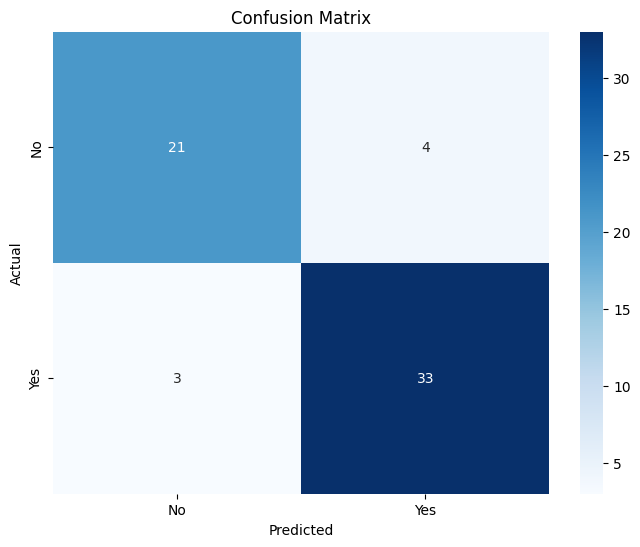

In [217]:
conf_matrix = confusion_matrix(test_y, predict_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [218]:
conf_matrix = confusion_matrix(test_y, predict_logistic)
print(conf_matrix)

[[21  4]
 [ 3 33]]


In [219]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import jaccard_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [220]:

df = pd.read_csv(r"heart.csv")
df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)
df = df.dropna()

df=df[pd.to_numeric(df['oldpeak'],errors='coerce').notnull()]
df['oldpeak']=df['oldpeak'].astype('int') 




df = df.drop(['chol', 'trtbps'], axis=1)



In [221]:

X = df[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = df['output'].values

sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X, y)
selected_feat_idx = sel.get_support()
selected_feat = df[['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].columns[selected_feat_idx]

X = df[selected_feat].values





normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X.astype(float))


In [222]:

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)
clf = svm.SVC(kernel='rbf')
clf.fit(train_x, train_y)

predict_tree = clf.predict(test_x)

In [223]:


accuracy_score = metrics.accuracy_score(test_y, predict_tree)
jaccard_score_value = jaccard_score(test_y, predict_tree)

print("metrics.accuracy_score:", accuracy_score)
print("metrics.jaccard_score:", jaccard_score_value)

metrics.accuracy_score: 0.8688524590163934
metrics.jaccard_score: 0.8


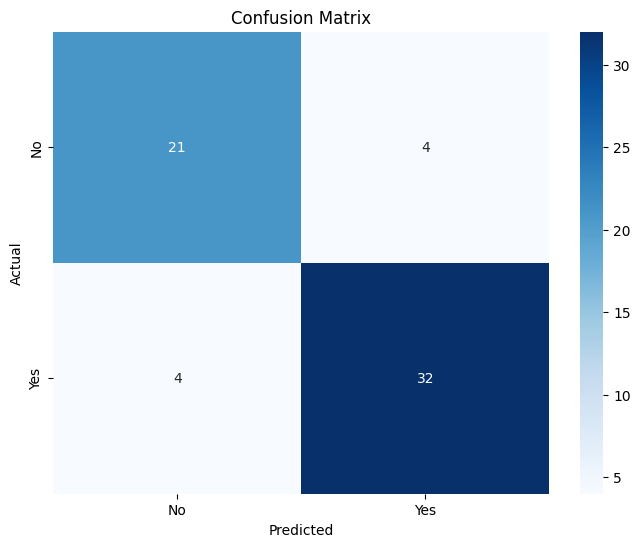

In [224]:

conf_matrix = confusion_matrix(test_y, predict_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [225]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv(r"heart.csv")
df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)
df = df.dropna()

df=df[pd.to_numeric(df['oldpeak'],errors='coerce').notnull()]
df['oldpeak']=df['oldpeak'].astype('int') 

X = df[['age',	'sex',	'cp'	,'trtbps',	'chol',	'fbs'	,'restecg',	'thalachh',	'exng',	'oldpeak',	'slp',	'caa',	'thall']].values
y = df['output'].values



In [226]:



normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X.astype(float))

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)
DecisionTreeClassifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecisionTreeClassifier.fit(train_x, train_y)

predict_tree = DecisionTreeClassifier.predict(test_x)


In [227]:
accuracy_score = metrics.accuracy_score(test_y, predict_tree)
jaccard_score_value = jaccard_score(test_y, predict_tree)

print("metrics.accuracy_score:", accuracy_score)
print("metrics.jaccard_score:", jaccard_score_value)


metrics.accuracy_score: 0.8524590163934426
metrics.jaccard_score: 0.7857142857142857


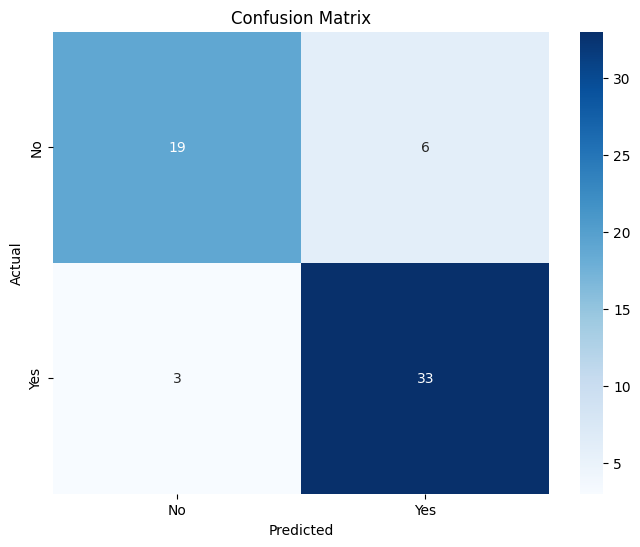

In [228]:



conf_matrix = confusion_matrix(test_y, predict_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv(r"heart.csv")

df.replace(['', ' ', 'NA', 'N/A', 'n/a', 'na'], np.nan, inplace=True)

df = df.dropna()

In [230]:

df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')
df = df.dropna(subset=['oldpeak'])
df['oldpeak'] = df['oldpeak'].astype(int)

print(df.isna().sum())

X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = df['output'].values


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [231]:

normalize = preprocessing.StandardScaler().fit(X)
X = normalize.transform(X.astype(float))

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(train_x, train_y)

predict_tree = neigh.predict(test_x)

In [232]:



accuracy_score = metrics.accuracy_score(test_y, predict_tree)
jaccard_score_value = jaccard_score(test_y, predict_tree)

print("metrics.accuracy_score:", accuracy_score)
print("metrics.jaccard_score:", jaccard_score_value)

metrics.accuracy_score: 0.8032786885245902
metrics.jaccard_score: 0.6842105263157895


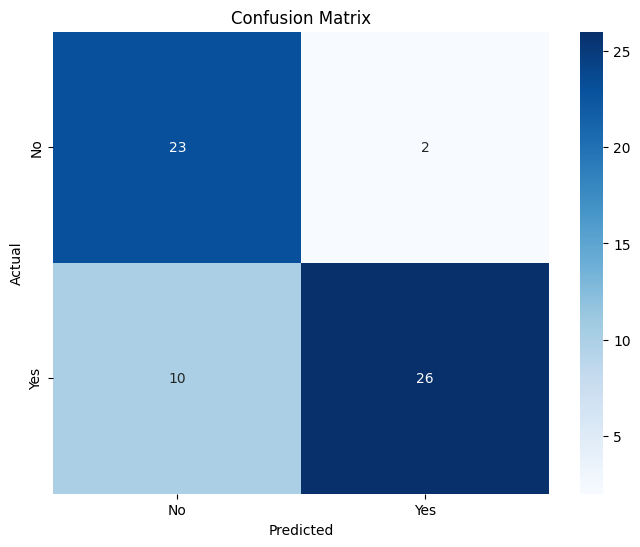

In [233]:


conf_matrix = confusion_matrix(test_y, predict_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
